referans https://github.com/aaryaab/Text-Classification-with-RNN/blob/main/rnn_with_imdb.py

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM,  Dense, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/veri/etiketliDataset.csv',encoding='utf-8-sig')

In [ ]:
#Girdi ve çıktı vektörleri oluşturun.
#Etiketleri işleyin.
X = df.comments
Y = df.sentiments
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
#Eğitim ve test verilerine böl
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [ ]:
words=20000
max_length=100
tok = Tokenizer(num_words=words)
tok.fit_on_texts(x_train)
sequences  = tok.texts_to_sequences(x_train)
sequences_matrix  = sequence.pad_sequences(sequences,maxlen=max_length)
word_size=words
embed_size=128

In [ ]:
#Tekrarlayan Bir Sinir Ağı Oluştur
model=tf.keras.Sequential()
# Embedding Layer
model.add(tf.keras.layers.Embedding(word_size, embed_size,input_length=max_length))
# LSTM Layer
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
# Output Layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Modeli derlemek
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_length)
t = model.fit(sequences_matrix, y_train, epochs = 5, batch_size=128,validation_data=(test_sequences_matrix,y_test))
test_loss, test_acc = model.evaluate(test_sequences_matrix, y_test,verbose=2,batch_size=128)
print("Test accuracy: {}".format(test_acurracy))

Epoch 1/5
408/408 [==============================] - 172s 423ms/step - loss: 0.0504 - accuracy: 0.9830 - val_loss: 0.4571 - val_accuracy: 0.8801
Epoch 2/5
408/408 [==============================] - 174s 426ms/step - loss: 0.0466 - accuracy: 0.9845 - val_loss: 0.4728 - val_accuracy: 0.8786
Epoch 3/5
408/408 [==============================] - 173s 425ms/step - loss: 0.0423 - accuracy: 0.9860 - val_loss: 0.4929 - val_accuracy: 0.8727
Epoch 4/5
408/408 [==============================] - 173s 423ms/step - loss: 0.0393 - accuracy: 0.9873 - val_loss: 0.5072 - val_accuracy: 0.8867
Epoch 5/5
408/408 [==============================] - 172s 423ms/step - loss: 0.0360 - accuracy: 0.9883 - val_loss: 0.5863 - val_accuracy: 0.8723
175/175 - 20s - loss: 0.5863 - accuracy: 0.8723
Test accuracy: 0.8858742117881775


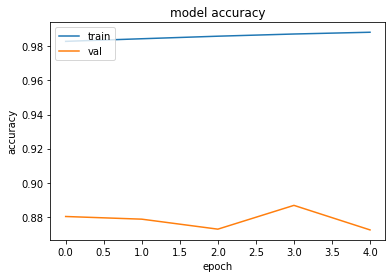

In [ ]:
from matplotlib import pyplot as plt
plt.plot(t.history['accuracy'])
plt.plot(t.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


referans: https://www.kaggle.com/egebasturk1/yemeksepeti-sentiment-analysis/data?select=lm.2gram.slm

In [ ]:
#confusion matrix
y_pred=model.predict(test_sequences_matrix,  batch_size=128, verbose=2, steps=None)
y_pred=y_pred>0.5
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,cohen_kappa_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)
print('True Positives: ',cm[1,1])
print('False Positives: ',cm[0,1])
print('True Negatives: ',cm[0,0])
print('False Negatives: ',cm[1,0])
from sklearn.metrics import accuracy_score

22335/22335 [==============================] - 144s 6ms/step
True Positives:  15556
False Positives:  1337
True Negatives:  4638
False Negatives:  804
Accuracy: 0.904141


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,cohen_kappa_score
print("RNN Accuracy Score -> ",accuracy)
print("RNN Precision Score -> ",precision_score(y_test,y_pred))
print("RNN Recall Score -> ",recall_score(y_test,y_pred))
print("RNN F1 Score -> ",f1_score(y_test,y_pred))
print("RNN Cohen's Kappa -> ",cohen_kappa_score(y_test,y_pred))

RNN Accuracy Score ->  0.9041414819789568
RNN Precision Score ->  0.9208547919256497
RNN Recall Score ->  0.9508557457212714
RNN F1 Score ->  0.9356148317445043
RNN Cohen's Kappa ->  0.7482758236775011
